# Creating and setting our first random forest model to our flood data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
import io

def perform_RandomForest(csv_file_path):
    """
    Performs linear regression on a dataset, calculates various error metrics,
    generates a vector plot of actual vs. predicted values, and saves
    the metrics to an Excel file.

    Args:
        csv_file_path (str): The path to the CSV file. All columns except the last
                             are treated as features (X), and the last column is the
                             target variable (y).
    """
    try:
        # Load the dataset
        df = pd.read_csv(csv_file_path)

        # Separate features (X) and target (y)
        X = df.iloc[:, :-1]  # All columns except the last
        y = df.iloc[:, -1]   # The last column

        # Split the data into training and testing sets (80/20 split)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Initialize and train the Random Forest Regressor model
        # The 'random_state' is set for reproducibility.
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # --- 1. Calculate Error Metrics ---
        print("--- Model Performance Metrics ---")

        # R-squared (Coefficient of Determination)
        r2 = r2_score(y_test, y_pred)
        print(f"R-squared (R2): {r2:.4f}")

        # Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Mean Absolute Error (MAE): {mae:.4f}")

        # Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error (MSE): {mse:.4f}")

        # Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mse)
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

        # Mean Absolute Percentage Error (MAPE)
        mape = mean_absolute_percentage_error(y_test, y_pred) * 100
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

        # Mean Squared Log Error (MSLE) - check for negative values
        if (y_test < 0).any() or (y_pred < 0).any():
            msle = 'N/A' # Not applicable for negative values
            print("MSLE: Skipped due to negative values in y_test or y_pred.")
        else:
            msle = mean_squared_log_error(y_test, y_pred)
            print(f"Mean Squared Log Error (MSLE): {msle:.4f}")

        # --- 2. Save Metrics to Excel ---
        # Create a dictionary to hold the metrics
        metrics_data = {
            'Model': ['Random Forest Regressor'],
            'R2 Score': [r2],
            'MAE': [mae],
            'MSE': [mse],
            'RMSE': [rmse],
            'MAPE': [mape],
            'MSLE': [msle]
        }
        
        # Create a DataFrame from the dictionary
        metrics_df = pd.DataFrame(metrics_data)

        # Save the DataFrame to an Excel file
        excel_path = 'model_performance.xlsx'
        metrics_df.to_excel(excel_path, index=False)
        print(f"\nModel performance metrics saved to '{excel_path}'")

        # --- 3. Generate Bisector Line Plot ---
        plt.figure(figsize=(8, 8))
        sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

        # Plot the bisector line (y=x) for reference
        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

        plt.title('Predicted vs. Actual Values with Bisector Line')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.grid(True)
        
        # Save the plot as a vector graphic (SVG format)
        plot_path = 'predicted_vs_actual.svg'
        plt.savefig(plot_path, format='svg')
        print(f"\nVector plot saved to '{plot_path}'")
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


--- Model Performance Metrics ---
R-squared (R2): -0.0231
Mean Absolute Error (MAE): 0.4989
Mean Squared Error (MSE): 0.2555
Root Mean Squared Error (RMSE): 0.5054
Mean Absolute Percentage Error (MAPE): 109029895178826032.00%
Mean Squared Log Error (MSLE): 0.1247

Model performance metrics saved to 'model_performance.xlsx'

Vector plot saved to 'predicted_vs_actual.svg'


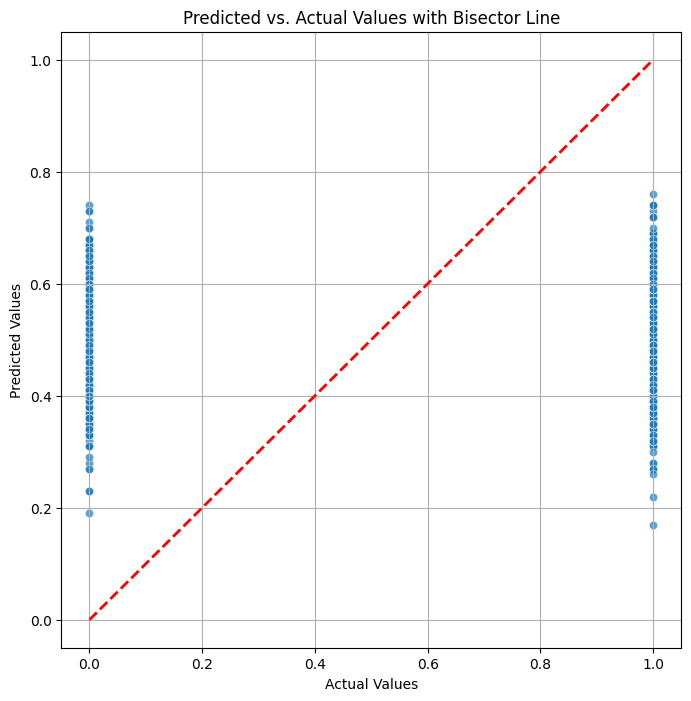

In [3]:
perform_RandomForest("../mapped_dataset_Normalized_version.csv")